In [1]:
#Linking drive to colab to store datasets
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Failed to fetch http://archive.ubuntu.com/ubuntu/pool/main/d/distro-info-data/distro-info-data_0.36ubuntu0.1_all.deb  404  Not Found [IP: 91.189.88.162 80]
E: Unable to fetch some archives, maybe run apt-get update or try with --fix-missing?
/bin/sh: 1: add-apt-repository: not found
E: Unable to locate package google-drive-ocamlfuse


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [4]:
# Generate creds for the Drive FUSE library. Though the link asks you to verify twice, you don't have to!
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [5]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print ('Files in Drive:')
!ls drive/

Files in Drive:
attributes.txt	 DL#3_EDA.ipynb     rules.docx	       train.csv
classes.txt	 kaggle		    StudentGrades.xls  train_img
Colab Notebooks  Module 01	    test.csv	       train_img.zip
created.txt	 Presentation.pptx  test_img	       weights.best.eda.hdf5


In [0]:
# Create a file in a new directory called "Kaggle" in your Google Drive. This will be your operation base :P
!echo "This newly created file will appear in your Drive file list. If you are reading this, that means the attempt to integrate was successful" > drive/kaggle/created.txt

In [9]:
#The uploaded files are in .zip format. The following code will unzip them into nice json files. This has to be done only the first time!
#!unzip "drive/kaggle/*.zip" -d drive/kaggle

#Now, remove those archives
#!rm -f drive/kaggle/*.zip

#Make directories for the data
!mkdir drive/kaggle/train drive/kaggle/validation drive/kaggle/test

mkdir: cannot create directory ‘drive/kaggle/train’: File exists
mkdir: cannot create directory ‘drive/kaggle/validation’: File exists
mkdir: cannot create directory ‘drive/kaggle/test’: File exists


In [14]:
#Now, to download the train set into your drive from the urls in the JSON files, execute the below.  Also, a file is generated with the ImageURL, imageName, imageId and 
#their labelIds.


import json
import time

train_data = json.load(open('drive/kaggle/train.json'))
!echo ImageURL, ImgName, ImgId, LabelId >> drive/kaggle/train/train.txt

for i in range(5825,5827):
  img_url = train_data['images'][i]['url']
  img_id = train_data['images'][i]['imageId']
  label_id = train_data['annotations'][i]['labelId']
  img_name="Image-"+str(i)
  #print img_name
  #img_name_actual = img_name.split("-")[0]
  img_name_large = img_name+".jpg"
  #print img_name_actual
  img_url_large = img_url.split("-")[-2]
  img_url_large = img_url_large + "-large"
  print (img_url_large)
  !curl $img_url_large > drive/kaggle/train/$img_name_large
  time.sleep(0.05) 
  !echo $img_url_large,$img_name_large,$img_id,$label_id >> drive/kaggle/train/train.txt 
  #time.sleep(0.5)

OSError: ignored

In [0]:
#To download validation data on to your drive...

import json
import time

val_data = json.load(open('drive/kaggle/validation.json'))
!echo ImageURL, ImgName, ImgId, LabelId >> drive/kaggle/validation/validation.txt 

for i in range(len(val_data['images'])):
  img_url = val_data['images'][i]['url']
  #print img_url
  img_id = val_data['images'][i]['imageId']
  #print img_id
  label_id = val_data['annotations'][i]['labelId']
  #print label_id
  img_name=img_url.split("/")[-1]
  #print img_name
  img_name_actual = img_name.split("-")[0]
  img_name_small = img_name_actual + "-small"+".jpg"
  #print img_name_actual
  img_url_small = img_url.split("-")[-2]
  img_url_small = img_url_small + "-small"
  print img_url_small
  !curl $img_url_small > drive/kaggle/validation/$img_name_small
  time.sleep(0.05)
  !echo $img_name_actual,$img_id,$label_id >> drive/kaggle/validation/validation.txt 
  #time.sleep(0.05)

In [0]:
#And this is for downloading test data into your drive

import json
import time

test_data = json.load(open('drive/kaggle/test.json'))
#print len(test_data['images'])

for i in range(len(test_data['images'])):
  img_url = test_data['images'][i]['url']
  #print img_url
  img_id = test_data['images'][i]['imageId']
  #print img_id
  img_name=img_url.split("/")[-1]
  #print img_name
  img_name_actual = img_name.split("-")[0]
  img_name_small = img_name_actual + "-small"+".jpg"
  #print img_name_actual
  img_url_small = img_url.split("-")[-2]
  img_url_small = img_url_small + "-small"
  print img_url_small
  !curl $img_url_small > drive/kaggle/test/$img_name_small
  time.sleep(0.05)

In [17]:
# 1. Load data =================================================================

import time
import json
script_start_time = time.time()

import pandas as pd
import numpy as np
print('%0.2f min: Start loading data'%((time.time() - script_start_time)/60))

train={}
test={}
validation={}
with open('/home/yash/Desktop/Fashion prediction/input/train.json') as json_data:
    train= json.load(json_data)
#with open('/home/yash/Desktop/Fashion prediction/input/test.json') as json_data:
    #test= json.load(json_data)
#with open('/home/yash/Desktop/Fashion prediction/input/validation.json') as json_data:
    #validation = json.load(json_data)

print('Train No. of images: %d'%(len(train['images'])))
#print('Test No. of images: %d'%(len(test['images'])))
#print('Validation No. of images: %d'%(len(validation['images'])))

# JSON TO PANDAS DATAFRAME
# train data
train_img_url=train['images']
train_img_url=pd.DataFrame(train_img_url)
trin_img_url=train_img_url[0:9752]
train_ann=train['annotations']
train_ann=pd.DataFrame(train_ann)
train_ann=train_ann[0:9752]
train=pd.merge(train_img_url, train_ann, on='imageId', how='inner')
train=train[0:9752]

# test data
#test=pd.DataFrame(test['images'])

# Validation Data
#val_img_url=validation['images']
#val_img_url=pd.DataFrame(val_img_url)
#val_ann=validation['annotations']
#val_ann=pd.DataFrame(val_ann)
#validation=pd.merge(val_img_url, val_ann, on='imageId', how='inner')

datas = {'Train': train}
for data in datas.values():
    data['imageId'] = data['imageId'].astype(np.uint32)

print('%0.2f min: Finish loading data'%((time.time() - script_start_time)/60))
print('='*50)

0.07 min: Start loading data
Train No. of images: 1014544
0.28 min: Finish loading data


In [8]:
i

TypeError: ignored

In [18]:
print('%0.2f min: Start converting label'%((time.time() - script_start_time)/60))
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_label = mlb.fit_transform(train['labelId'])
#validation_label = mlb.transform(validation['labelId'])
dummy_label_col = list(mlb.classes_)
print(dummy_label_col)
print('%0.2f min: Finish converting label'%((time.time() - script_start_time)/60))

for data in [train_label, test]:
    print(data.shape)

0.48 min: Start converting label
['1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '157', '158', '159', '160', '161', '162', '164', '165', '166', '167', '168', '169', '17', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '18', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '19', '190', '191', '192', '193', '195', '196', '197', '198', '199', '2', '20', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '21', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '22', '220', '221', '222', '223', '224', '225', '226', '227', '228', '23', '24

AttributeError: 'dict' object has no attribute 'shape'

In [5]:

dummy_label_col = pd.DataFrame(columns = dummy_label_col)
# dummy_label_col.to_csv('%s/dummy_label_col.csv'%'', index = False)
# np.save('%s/dummy_label_train.npy' % '', train_label)
# np.save('%s/dummy_label_val.npy' % '', validation_label)
dummy_label_col.head()

,1,10,100,101,102,103,104,105,106,107,...,9,90,91,92,93,95,96,97,98,99


In [8]:


# Save as csv if you prefer
train_label = pd.DataFrame(data = train_label, columns = list(mlb.classes_))
train_label.head()
#validation_label = pd.DataFrame(data = validation_label, columns = list(mlb.classes_))
#validation_label.head()



,1,10,100,101,102,103,104,105,106,107,...,9,90,91,92,93,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train_label.head()


,1,10,100,101,102,103,104,105,106,107,...,9,90,91,92,93,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
train.head()

,imageId,url,labelId
0,1,https://contestimg.wish.com/api/webimage/570f3...,"[95, 66, 137, 70, 20]"
1,2,https://contestimg.wish.com/api/webimage/5468f...,"[36, 66, 44, 214, 105, 133]"
2,3,https://contestimg.wish.com/api/webimage/54641...,"[170, 66, 97, 153, 105, 138]"
3,4,https://contestimg.wish.com/api/webimage/550b9...,"[18, 66, 44, 153, 164]"
4,5,https://contestimg.wish.com/api/webimage/54451...,"[189, 66, 176, 137, 153, 74, 181, 171, 138]"


In [11]:
# Shape of training and test datasets
print ('Training dataset consists of {} images with {} attributes'.format(train_label.shape[0], train_label.shape[1]-1))
# Shape of training and test datasets
#print ('Testing dataset consists of {} images.'.format(test.shape[0]))

Training dataset consists of 9752 images with 220 attributes


In [12]:
cols = list(train_label.columns)
cols.sort()
count_labels = train_label[cols].sum()

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from glob import glob
%matplotlib inline

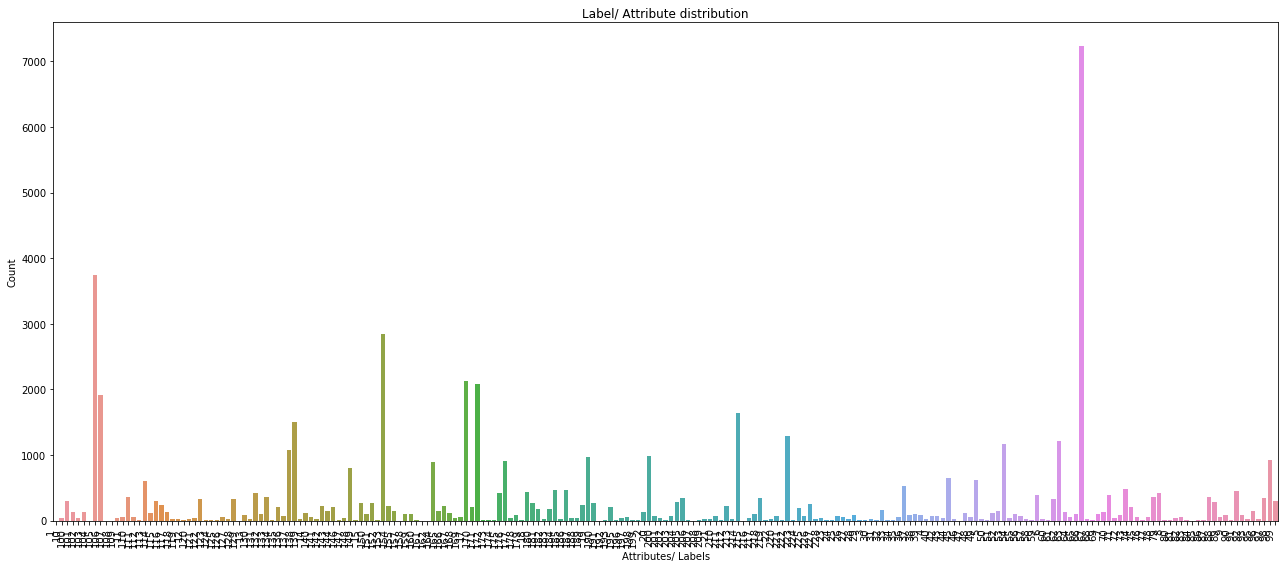

In [14]:
plt.figure(figsize=(18, 8))
ax = sns.barplot(x=count_labels.index, y=count_labels.values)
ax.set_xticklabels(labels=count_labels.index,rotation=90, ha='right')
ax.set_ylabel('Count')
ax.set_xlabel('Attributes/ Labels')
ax.title.set_text('Label/ Attribute distribution')
plt.tight_layout()

In [1]:
TRAIN_PATH = '/home/yash/Desktop/Fashion prediction/train_file/'

In [2]:
image_path=TRAIN_PATH+"Image-"+str(0)+".jpg"
print(image_path)

/home/yash/Desktop/Fashion prediction/train_file/Image-0.jpg


In [3]:
from PIL import Image
import cv2

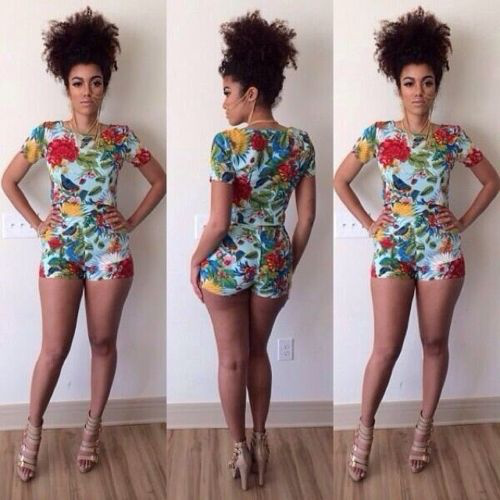

In [4]:
Image.open(image_path)

In [5]:
img = cv2.imread(image_path)
img

array([[[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [208, 215, 224],
        [208, 215, 224],
        [208, 215, 224]],

       [[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [207, 214, 223],
        [207, 214, 223],
        [207, 214, 223]],

       [[230, 235, 244],
        [230, 235, 244],
        [230, 235, 244],
        ...,
        [206, 213, 222],
        [206, 213, 222],
        [206, 213, 222]],

       ...,

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 73,  86, 118],
        [ 68,  81, 113],
        [ 67,  80, 112]],

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 77,  90, 122],
        [ 70,  83, 115],
        [ 66,  79, 111]],

       [[ 98, 114, 143],
        [ 93, 109, 138],
        [ 97, 111, 140],
        ...,
        [ 81,  94, 126],
        [ 72,  85, 117],
        [ 68,  81, 113]]

In [24]:
img.shape

(500, 500, 3)

    100% |████████████████████████████████| 51kB 1.9MB/s 



  0%|          | 0/10000 [00:00<?, ?it/s]


error: ignored

In [7]:
train_img = []
for i in range(0,9752):
  img=cv2.imread(TRAIN_PATH+"Image-"+str(i)+".jpg")
  img = cv2.resize(img, (128, 128))
  progress=(i/9752)*100
  print(progress)
  
  train_img.append(img)

0.0
0.010254306808859722
0.020508613617719443
0.030762920426579164
0.04101722723543889
0.05127153404429861
0.06152584085315833
0.07178014766201805
0.08203445447087777
0.09228876127973748
0.10254306808859721
0.11279737489745695
0.12305168170631665
0.13330598851517636
0.1435602953240361
0.1538146021328958
0.16406890894175555
0.17432321575061527
0.18457752255947496
0.1948318293683347
0.20508613617719443
0.21534044298605415
0.2255947497949139
0.2358490566037736
0.2461033634126333
0.25635767022149303
0.2666119770303527
0.27686628383921247
0.2871205906480722
0.2973748974569319
0.3076292042657916
0.31788351107465135
0.3281378178835111
0.3383921246923708
0.34864643150123054
0.35890073831009023
0.3691550451189499
0.37940935192780967
0.3896636587366694
0.3999179655455291
0.41017227235438886
0.42042657916324855
0.4306808859721083
0.44093519278096804
0.4511894995898278
0.46144380639868743
0.4716981132075472
0.48195242001640687
0.4922067268252666
0.5024610336341263
0.5127153404429861
0.522969647251

4.501640689089418
4.5118949958982775
4.522149302707136
4.532403609515997
4.542657916324856
4.552912223133716
4.563166529942576
4.573420836751436
4.583675143560296
4.5939294503691555
4.604183757178014
4.614438063986874
4.624692370795734
4.634946677604594
4.645200984413454
4.655455291222314
4.665709598031173
4.675963904840033
4.686218211648892
4.696472518457752
4.706726825266612
4.716981132075472
4.727235438884332
4.737489745693191
4.747744052502051
4.7579983593109105
4.76825266611977
4.778506972928629
4.78876127973749
4.799015586546349
4.809269893355209
4.819524200164069
4.829778506972929
4.8400328137817885
4.850287120590648
4.860541427399507
4.870795734208368
4.881050041017227
4.891304347826087
4.901558654634947
4.911812961443807
4.922067268252666
4.932321575061526
4.942575881870385
4.952830188679245
4.963084495488105
4.973338802296965
4.983593109105825
4.993847415914685
5.004101722723544
5.0143560295324034
5.024610336341263
5.034864643150123
5.045118949958983
5.055373256767842
5.06562

9.17760459392945
9.187858900738311
9.19811320754717
9.208367514356029
9.21862182116489
9.228876127973749
9.239130434782608
9.249384741591468
9.259639048400329
9.269893355209188
9.280147662018047
9.290401968826908
9.300656275635767
9.310910582444627
9.321164889253486
9.331419196062345
9.341673502871206
9.351927809680067
9.362182116488924
9.372436423297785
9.382690730106646
9.392945036915505
9.403199343724364
9.413453650533224
9.423707957342083
9.433962264150944
9.444216570959803
9.454470877768664
9.464725184577523
9.474979491386382
9.485233798195242
9.495488105004101
9.505742411812962
9.515996718621821
9.52625102543068
9.53650533223954
9.546759639048402
9.557013945857259
9.56726825266612
9.57752255947498
9.58777686628384
9.598031173092698
9.608285479901559
9.618539786710418
9.628794093519279
9.639048400328138
9.649302707136997
9.659557013945857
9.669811320754718
9.680065627563577
9.690319934372436
9.700574241181297
9.710828547990156
9.721082854799015
9.731337161607875
9.741591468416736


13.740771123872026
13.751025430680885
13.761279737489746
13.771534044298605
13.781788351107465
13.792042657916326
13.802296964725185
13.812551271534042
13.822805578342903
13.833059885151764
13.843314191960623
13.853568498769484
13.863822805578344
13.874077112387203
13.884331419196064
13.894585726004921
13.90484003281378
13.915094339622641
13.925348646431502
13.93560295324036
13.945857260049221
13.956111566858082
13.96636587366694
13.976620180475798
13.986874487284659
13.99712879409352
14.007383100902379
14.01763740771124
14.027891714520099
14.03814602132896
14.048400328137816
14.058654634946677
14.068908941755536
14.079163248564397
14.089417555373258
14.099671862182117
14.109926168990977
14.120180475799838
14.130434782608695
14.140689089417554
14.150943396226415
14.161197703035274
14.171452009844135
14.181706316652996
14.191960623461854
14.202214930270712
14.212469237079572
14.222723543888433
14.232977850697292
14.243232157506153
14.253486464315014
14.263740771123873
14.273995077932733

18.262920426579164
18.27317473338802
18.283429040196882
18.293683347005743
18.303937653814604
18.314191960623464
18.32444626743232
18.334700574241182
18.34495488105004
18.3552091878589
18.36546349466776
18.375717801476622
18.385972108285483
18.39622641509434
18.406480721903197
18.416735028712058
18.42698933552092
18.43724364232978
18.44749794913864
18.457752255947497
18.468006562756358
18.478260869565215
18.488515176374076
18.498769483182937
18.509023789991797
18.519278096800658
18.529532403609515
18.539786710418376
18.550041017227237
18.560295324036094
18.570549630844955
18.580803937653815
18.591058244462673
18.601312551271533
18.611566858080394
18.621821164889255
18.632075471698112
18.642329778506973
18.652584085315834
18.66283839212469
18.67309269893355
18.683347005742412
18.693601312551273
18.703855619360134
18.71410992616899
18.724364232977848
18.73461853978671
18.74487284659557
18.75512715340443
18.76538146021329
18.775635767022152
18.78589007383101
18.796144380639866
18.80639868

22.7850697292863
22.79532403609516
22.80557834290402
22.81583264971288
22.82608695652174
22.8363412633306
22.846595570139456
22.856849876948317
22.867104183757178
22.87735849056604
22.8876127973749
22.89786710418376
22.908121410992617
22.918375717801474
22.928630024610335
22.938884331419196
22.949138638228057
22.959392945036917
22.969647251845775
22.979901558654635
22.990155865463493
23.000410172272353
23.010664479081214
23.020918785890075
23.031173092698936
23.041427399507793
23.051681706316653
23.06193601312551
23.07219031993437
23.082444626743232
23.092698933552093
23.10295324036095
23.11320754716981
23.12346185397867
23.133716160787532
23.14397046759639
23.15422477440525
23.16447908121411
23.17473338802297
23.18498769483183
23.19524200164069
23.20549630844955
23.21575061525841
23.22600492206727
23.236259228876126
23.246513535684986
23.256767842493847
23.267022149302708
23.27727645611157
23.287530762920426
23.297785069729287
23.308039376538144
23.318293683347004
23.328547990155865
2

27.532813781788352
27.54306808859721
27.55332239540607
27.56357670221493
27.57383100902379
27.584085315832652
27.594339622641513
27.60459392945037
27.614848236259228
27.625102543068085
27.635356849876946
27.645611156685806
27.655865463494667
27.666119770303528
27.676374077112385
27.686628383921246
27.696882690730106
27.707136997538967
27.717391304347828
27.72764561115669
27.737899917965546
27.748154224774407
27.758408531583267
27.768662838392128
27.77891714520098
27.789171452009843
27.799425758818703
27.80968006562756
27.81993437243642
27.830188679245282
27.840442986054143
27.850697292863003
27.860951599671864
27.87120590648072
27.881460213289582
27.891714520098443
27.901968826907304
27.912223133716164
27.92247744052502
27.93273174733388
27.942986054142736
27.953240360951597
27.963494667760457
27.973748974569318
27.98400328137818
27.99425758818704
28.004511894995897
28.014766201804758
28.02502050861362
28.03527481542248
28.04552912223134
28.055783429040197
28.066037735849058
28.0762920

32.24979491386382
32.260049220672684
32.270303527481545
32.280557834290406
32.29081214109926
32.30106644790812
32.31132075471698
32.32157506152584
32.3318293683347
32.34208367514356
32.352337981952424
32.36259228876128
32.37284659557014
32.383100902379
32.39335520918786
32.40360951599672
32.41386382280558
32.424118129614435
32.434372436423295
32.444626743232156
32.45488105004102
32.46513535684988
32.47538966365874
32.4856439704676
32.49589827727646
32.50615258408532
32.516406890894174
32.526661197703035
32.536915504511896
32.54716981132076
32.55742411812961
32.56767842493847
32.57793273174733
32.58818703855619
32.59844134536505
32.608695652173914
32.618949958982775
32.629204265791635
32.639458572600496
32.64971287940936
32.65996718621821
32.67022149302707
32.68047579983593
32.690730106644786
32.70098441345365
32.71123872026251
32.72149302707137
32.73174733388023
32.74200164068909
32.75225594749795
32.76251025430681
32.77276456111567
32.78301886792453
32.793273174733386
32.8035274815422

36.925758818703855
36.936013125512716
36.94626743232157
36.95652173913043
36.96677604593929
36.97703035274815
36.98728465955701
36.99753896636587
37.007793273174734
37.018047579983595
37.028301886792455
37.038556193601316
37.04881050041017
37.05906480721903
37.06931911402789
37.07957342083675
37.08982772764561
37.10008203445447
37.11033634126333
37.12059064807219
37.13084495488105
37.14109926168991
37.15135356849877
37.16160787530763
37.17186218211649
37.182116488925345
37.192370795734206
37.20262510254307
37.21287940935193
37.22313371616079
37.23338802296965
37.24364232977851
37.25389663658737
37.264150943396224
37.274405250205085
37.284659557013946
37.294913863822806
37.30516817063167
37.31542247744052
37.32567678424938
37.33593109105824
37.3461853978671
37.356439704675964
37.366694011484825
37.376948318293685
37.387202625102546
37.39745693191141
37.40771123872027
37.41796554552913
37.42821985233798
37.43847415914684
37.448728465955696
37.45898277276456
37.46923707957342
37.479491386

41.73502871205906
41.74528301886792
41.755537325676784
41.765791632485644
41.776045939294505
41.786300246103366
41.79655455291223
41.80680885972109
41.81706316652994
41.8273174733388
41.83757178014766
41.84782608695652
41.85808039376538
41.86833470057424
41.8785890073831
41.88884331419196
41.89909762100082
41.90935192780968
41.91960623461854
41.9298605414274
41.94011484823626
41.95036915504512
41.96062346185398
41.97087776866284
41.9811320754717
41.99138638228056
42.00164068908942
42.011894995898274
42.022149302707135
42.032403609515995
42.042657916324856
42.05291222313372
42.06316652994258
42.07342083675144
42.08367514356029
42.09392945036915
42.10418375717801
42.114438063986874
42.124692370795735
42.134946677604596
42.14520098441346
42.15545529122232
42.16570959803118
42.17596390484003
42.18621821164889
42.19647251845775
42.206726825266614
42.21698113207547
42.22723543888433
42.23748974569319
42.24774405250205
42.25799835931091
42.26825266611977
42.27850697292863
42.28876127973749
42

46.564807219032
46.57506152584085
46.58531583264971
46.59557013945857
46.60582444626743
46.61607875307629
46.62633305988515
46.63658736669401
46.64684167350287
46.65709598031173
46.66735028712059
46.67760459392945
46.68785890073831
46.69811320754717
46.70836751435603
46.71862182116489
46.72887612797375
46.73913043478261
46.74938474159147
46.759639048400324
46.769893355209184
46.780147662018045
46.790401968826906
46.80065627563577
46.81091058244463
46.82116488925349
46.83141919606235
46.8416735028712
46.85192780968006
46.862182116488924
46.872436423297785
46.882690730106646
46.892945036915506
46.90319934372437
46.91345365053323
46.92370795734208
46.93396226415094
46.9442165709598
46.954470877768664
46.964725184577524
46.97497949138638
46.98523379819524
46.9954881050041
47.00574241181296
47.01599671862182
47.02625102543068
47.03650533223954
47.0467596390484
47.057013945857264
47.067268252666125
47.07752255947498
47.08777686628384
47.0980311730927
47.108285479901554
47.118539786710414
47.

51.189499589827726
51.199753896636594
51.21000820344545
51.22026251025431
51.23051681706316
51.24077112387203
51.25102543068088
51.26127973748975
51.271534044298605
51.28178835110746
51.292042657916326
51.30229696472518
51.31255127153405
51.3228055783429
51.33305988515177
51.34331419196062
51.353568498769484
51.36382280557834
51.374077112387205
51.38433141919606
51.39458572600493
51.40484003281378
51.41509433962265
51.4253486464315
51.435602953240355
51.44585726004922
51.45611156685808
51.466365873666945
51.4766201804758
51.48687448728466
51.49712879409351
51.50738310090238
51.517637407711234
51.5278917145201
51.538146021328956
51.548400328137824
51.55865463494668
51.568908941755545
51.5791632485644
51.58941755537325
51.59967186218212
51.609926168990974
51.620180475799835
51.63043478260869
51.640689089417556
51.65094339622641
51.66119770303528
51.67145200984413
51.681706316653
51.69196062346185
51.70221493027072
51.712469237079574
51.722723543888435
51.732977850697296
51.74323215750615

55.98851517637408
55.99876948318294
56.009023789991794
56.01927809680065
56.029532403609515
56.03978671041837
56.05004101722724
56.06029532403609
56.07054963084496
56.08080393765381
56.09105824446268
56.10131255127153
56.111566858080394
56.121821164889255
56.132075471698116
56.14232977850697
56.15258408531584
56.16283839212469
56.173092698933544
56.18334700574241
56.193601312551266
56.203855619360134
56.21410992616899
56.224364232977855
56.23461853978671
56.24487284659557
56.25512715340443
56.26538146021329
56.275635767022145
56.28589007383101
56.296144380639866
56.306398687448734
56.31665299425759
56.326907301066456
56.33716160787531
56.34741591468416
56.35767022149303
56.367924528301884
56.378178835110745
56.388433141919606
56.39868744872847
56.40894175553732
56.41919606234619
56.42945036915504
56.43970467596391
56.44995898277276
56.46021328958163
56.470467596390485
56.48072190319935
56.490976210008206
56.50123051681706
56.51148482362592
56.52173913043478
56.53199343724364
56.5422477

60.79778506972928
60.80803937653815
60.818293683347
60.82854799015587
60.83880229696472
60.84905660377359
60.859310910582444
60.86956521739131
60.879819524200165
60.890073831009026
60.90032813781788
60.91058244462675
60.9208367514356
60.931091058244455
60.94134536505332
60.951599671862176
60.961853978671044
60.9721082854799
60.982362592288766
60.99261689909762
61.00287120590649
61.01312551271534
61.0233798195242
61.033634126333055
61.04388843314192
61.05414273995078
61.064397046759645
61.0746513535685
61.08490566037735
61.09515996718622
61.10541427399507
61.11566858080394
61.125922887612795
61.13617719442166
61.146431501230516
61.15668580803938
61.16694011484823
61.1771944216571
61.18744872846595
61.19770303527482
61.207957342083674
61.21821164889254
61.228465955701395
61.23872026251025
61.24897456931912
61.25922887612797
61.26948318293684
61.27973748974569
61.28999179655455
61.300246103363406
61.310500410172274
61.32075471698113
61.331009023789996
61.34126333059885
61.35151763740772
6

65.53527481542247
65.54552912223134
65.55578342904019
65.56603773584906
65.57629204265791
65.58654634946677
65.59680065627563
65.6070549630845
65.61730926989335
65.62756357670222
65.63781788351108
65.64807219031994
65.6583264971288
65.66858080393764
65.67883511074652
65.68908941755537
65.69934372436424
65.70959803117309
65.71985233798195
65.73010664479081
65.74036095159967
65.75061525840853
65.76086956521739
65.77112387202625
65.78137817883511
65.79163248564397
65.80188679245283
65.8121410992617
65.82239540607056
65.83264971287942
65.84290401968826
65.85315832649712
65.86341263330598
65.87366694011484
65.8839212469237
65.89417555373257
65.90442986054143
65.91468416735029
65.92493847415915
65.93519278096801
65.94544708777687
65.95570139458573
65.96595570139459
65.97621000820345
65.9864643150123
65.99671862182116
66.00697292863002
66.01722723543888
66.02748154224774
66.0377358490566
66.04799015586546
66.05824446267432
66.06849876948318
66.07875307629205
66.0890073831009
66.09926168990977

70.32403609515997
70.33429040196883
70.34454470877769
70.35479901558655
70.36505332239541
70.37530762920426
70.38556193601313
70.39581624282198
70.40607054963085
70.4163248564397
70.42657916324856
70.43683347005742
70.44708777686628
70.45734208367514
70.467596390484
70.47785069729287
70.48810500410173
70.49835931091059
70.50861361771943
70.51886792452831
70.52912223133715
70.53937653814603
70.54963084495488
70.55988515176375
70.5701394585726
70.58039376538146
70.59064807219032
70.60090237899918
70.61115668580804
70.6214109926169
70.63166529942576
70.64191960623461
70.65217391304348
70.66242821985233
70.6726825266612
70.68293683347005
70.69319114027893
70.70344544708777
70.71369975389665
70.7239540607055
70.73420836751436
70.74446267432322
70.75471698113208
70.76497128794094
70.77522559474978
70.78547990155866
70.7957342083675
70.80598851517638
70.81624282198523
70.8264971287941
70.83675143560295
70.84700574241182
70.85726004922067
70.86751435602953
70.87776866283839
70.88802296964725
7

75.26661197703035
75.27686628383921
75.28712059064807
75.29737489745693
75.3076292042658
75.31788351107464
75.32813781788352
75.33839212469236
75.34864643150124
75.35890073831008
75.36915504511896
75.3794093519278
75.38966365873667
75.39991796554553
75.41017227235439
75.42042657916325
75.43068088597211
75.44093519278097
75.45118949958983
75.46144380639869
75.47169811320755
75.48195242001641
75.49220672682526
75.50246103363413
75.51271534044298
75.52296964725184
75.5332239540607
75.54347826086956
75.55373256767842
75.56398687448728
75.57424118129614
75.584495488105
75.59474979491387
75.60500410172273
75.61525840853159
75.62551271534045
75.63576702214931
75.64602132895816
75.65627563576702
75.66652994257588
75.67678424938474
75.6870385561936
75.69729286300246
75.70754716981132
75.71780147662018
75.72805578342904
75.7383100902379
75.74856439704676
75.75881870385562
75.76907301066448
75.77932731747335
75.78958162428219
75.79983593109105
75.81009023789991
75.82034454470877
75.83059885151764

80.08613617719442
80.09639048400328
80.10664479081214
80.116899097621
80.12715340442986
80.13740771123872
80.14766201804758
80.15791632485644
80.1681706316653
80.17842493847415
80.18867924528303
80.19893355209187
80.20918785890075
80.2194421657096
80.22969647251846
80.23995077932732
80.25020508613618
80.26045939294504
80.2707136997539
80.28096800656276
80.29122231337162
80.30147662018048
80.31173092698933
80.3219852337982
80.33223954060705
80.34249384741592
80.35274815422477
80.36300246103364
80.37325676784249
80.38351107465135
80.39376538146021
80.40401968826907
80.41427399507793
80.4245283018868
80.43478260869566
80.4450369155045
80.45529122231338
80.46554552912222
80.4757998359311
80.48605414273995
80.49630844954882
80.50656275635767
80.51681706316654
80.52707136997539
80.53732567678425
80.54757998359311
80.55783429040197
80.56808859721083
80.57834290401968
80.58859721082855
80.5988515176374
80.60910582444627
80.61936013125512
80.629614438064
80.63986874487284
80.6501230516817
80.66

85.01845775225596
85.0287120590648
85.03896636587368
85.04922067268252
85.05947497949138
85.06972928630024
85.0799835931091
85.09023789991797
85.10049220672683
85.11074651353569
85.12100082034455
85.13125512715341
85.14150943396226
85.15176374077113
85.16201804757998
85.17227235438884
85.1825266611977
85.19278096800656
85.20303527481542
85.21328958162428
85.22354388843314
85.233798195242
85.24405250205086
85.25430680885972
85.26456111566858
85.27481542247745
85.2850697292863
85.29532403609515
85.30557834290403
85.31583264971287
85.32608695652173
85.3363412633306
85.34659557013946
85.35684987694832
85.36710418375718
85.37735849056604
85.3876127973749
85.39786710418376
85.40812141099262
85.41837571780148
85.42863002461034
85.43888433141919
85.44913863822805
85.45939294503691
85.46964725184577
85.47990155865463
85.49015586546349
85.50041017227235
85.51066447908121
85.52091878589007
85.53117309269894
85.5414273995078
85.55168170631666
85.56193601312552
85.57219031993438
85.58244462674324
8

89.85849056603774
89.86874487284659
89.87899917965545
89.88925348646431
89.89950779327317
89.90976210008203
89.9200164068909
89.93027071369976
89.94052502050862
89.95077932731748
89.96103363412632
89.9712879409352
89.98154224774404
89.99179655455292
90.00205086136177
90.01230516817064
90.02255947497949
90.03281378178835
90.04306808859721
90.05332239540607
90.06357670221493
90.07383100902379
90.08408531583265
90.09433962264151
90.10459392945037
90.11484823625922
90.1251025430681
90.13535684987694
90.14561115668582
90.15586546349466
90.16611977030354
90.17637407711238
90.18662838392125
90.1968826907301
90.20713699753897
90.21739130434783
90.22764561115667
90.23789991796555
90.2481542247744
90.25840853158327
90.26866283839212
90.27891714520099
90.28917145200984
90.29942575881871
90.30968006562756
90.31993437243642
90.33018867924528
90.34044298605414
90.350697292863
90.36095159967186
90.37120590648072
90.38146021328957
90.39171452009845
90.4019688269073
90.41222313371617
90.42247744052501


94.5754716981132
94.58572600492207
94.59598031173093
94.60623461853979
94.61648892534865
94.62674323215751
94.63699753896636
94.64725184577523
94.65750615258408
94.66776045939295
94.6780147662018
94.68826907301067
94.69852337981952
94.70877768662838
94.71903199343724
94.7292863002461
94.73954060705496
94.74979491386382
94.76004922067268
94.77030352748154
94.7805578342904
94.79081214109925
94.80106644790813
94.81132075471697
94.82157506152585
94.8318293683347
94.84208367514356
94.85233798195242
94.86259228876128
94.87284659557014
94.883100902379
94.89335520918786
94.90360951599672
94.91386382280558
94.92411812961444
94.9343724364233
94.94462674323215
94.95488105004102
94.96513535684987
94.97538966365873
94.98564397046759
94.99589827727645
95.00615258408531
95.01640689089417
95.02666119770304
95.0369155045119
95.04716981132076
95.05742411812962
95.06767842493848
95.07793273174734
95.0881870385562
95.09844134536505
95.1086956521739
95.11894995898277
95.12920426579163
95.13945857260049
95.

99.37448728465955
99.38474159146841
99.39499589827727
99.40525020508613
99.415504511895
99.42575881870386
99.43601312551272
99.44626743232158
99.45652173913044
99.4667760459393
99.47703035274816
99.48728465955702
99.49753896636587
99.50779327317474
99.51804757998359
99.52830188679245
99.53855619360131
99.54881050041017
99.55906480721903
99.56931911402789
99.57957342083675
99.58982772764561
99.60008203445447
99.61033634126333
99.6205906480722
99.63084495488104
99.64109926168992
99.65135356849876
99.66160787530764
99.67186218211648
99.68211648892536
99.6923707957342
99.70262510254307
99.71287940935193
99.72313371616079
99.73338802296965
99.74364232977851
99.75389663658737
99.76415094339622
99.77440525020509
99.78465955701394
99.79491386382281
99.80516817063166
99.81542247744053
99.82567678424938
99.83593109105826
99.8461853978671
99.85643970467596
99.86669401148482
99.87694831829369
99.88720262510255
99.89745693191139
99.90771123872027
99.91796554552911
99.92821985233799
99.9384741591468

In [8]:
import numpy as np
X_train = np.array(train_img, np.float32) / 255.

In [9]:
print(train_img[0])

[[[230 235 244]
  [230 235 244]
  [229 234 243]
  ...
  [208 214 224]
  [206 213 222]
  [206 214 222]]

 [[230 235 244]
  [230 235 244]
  [229 234 243]
  ...
  [206 213 222]
  [205 212 221]
  [204 211 220]]

 [[230 235 244]
  [231 236 245]
  [231 236 245]
  ...
  [203 210 219]
  [203 210 219]
  [205 212 221]]

 ...

 [[ 99 115 144]
  [ 98 116 147]
  [ 89 107 140]
  ...
  [ 96 107 139]
  [ 81  92 124]
  [ 85  98 130]]

 [[ 98 114 144]
  [ 97 113 145]
  [ 87 104 137]
  ...
  [ 91 102 134]
  [ 85  96 128]
  [ 72  84 118]]

 [[ 95 110 139]
  [103 113 146]
  [ 88  98 132]
  ...
  [ 82  96 127]
  [ 90 103 135]
  [ 72  85 117]]]


In [10]:
import gc
del train_img
gc.collect()

0

In [11]:
mean_img = X_train.mean(axis=0)

In [12]:
std_dev = X_train.std(axis = 0)

In [13]:

X_norm = (X_train - mean_img)/ std_dev



In [14]:
X_norm.shape

(9752, 128, 128, 3)

In [15]:

del X_train
gc.collect()





0

In [19]:
print(train_label[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [25]:

y = train_label



In [26]:
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [28]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.25, random_state=47)

In [29]:
del X_norm
gc.collect()

252

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [31]:
gc.collect()

0

In [38]:
model = Sequential()
model.add(BatchNormalization(input_shape=Xtrain.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu',padding= 'same'))
model.add(Conv2D(32, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.3))

model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu', padding='same'))
model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(221, activation='sigmoid'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 42, 42, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 64)        36928     
__________

In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
early_stops = EarlyStopping(patience=3, monitor='val_acc')
checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)

In [42]:
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=30, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 7314 samples, validate on 2438 samples
Epoch 1/30
7314/7314 [==============================] - 31s 4ms/step - loss: 0.0981 - acc: 0.9724 - val_loss: 0.0885 - val_acc: 0.9759

Epoch 00001: val_loss improved from inf to 0.08849, saving model to weights.best.eda.hdf5
Epoch 2/30
7314/7314 [==============================] - 21s 3ms/step - loss: 0.0868 - acc: 0.9763 - val_loss: 0.0851 - val_acc: 0.9764

Epoch 00002: val_loss improved from 0.08849 to 0.08509, saving model to weights.best.eda.hdf5
Epoch 3/30
7314/7314 [==============================] - 21s 3ms/step - loss: 0.0854 - acc: 0.9764 - val_loss: 0.0836 - val_acc: 0.9762

Epoch 00003: val_loss improved from 0.08509 to 0.08356, saving model to weights.best.eda.hdf5
Epoch 4/30
7314/7314 [==============================] - 21s 3ms/step - loss: 0.0843 - acc: 0.9767 - val_loss: 0.0828 - val_acc: 0.9765

Epoch 00004: val_loss improved from 0.08356 to 0.08279, saving model to weights.best.eda.hdf5
Epoch 5/30
7314/7314 [==============

In [43]:
train_pred = model.predict(Xtrain).round()

In [44]:
f1_score(ytrain, train_pred, average='samples')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.4053129832022849

In [45]:

valid_pred = model.predict(Xvalid).round()

In [46]:
f1_score(yvalid, valid_pred, average='samples')

/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


0.35872687118947316